In [58]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import collections

In [14]:
unfiltered = pd.read_csv('~/workspace/DavidAshbrook_paper/BXD_variants_MM_strs_highQ_calls_pos_motif', sep=' ', header=None, names=['chr', 'pos', 'motif_len'])


In [15]:
unfiltered

,chr,pos,motif_len
0,chr1,3004986,4
1,chr1,3005549,5
2,chr1,3009351,2
3,chr1,3011925,2
4,chr1,3013640,4
...,...,...,...
1176011,chr19,61311174,6
1176012,chr19,61312243,5
1176013,chr19,61318476,4
1176014,chr19,61322247,3


In [53]:
unfiltered_count = Counter(unfiltered['motif_len'])

In [57]:
unfiltered_count

Counter({4: 498409,
         5: 122911,
         2: 346095,
         3: 146752,
         7: 7967,
         6: 40571,
         14: 544,
         8: 5246,
         18: 339,
         11: 594,
         12: 621,
         9: 1646,
         15: 866,
         13: 425,
         10: 1317,
         20: 368,
         17: 591,
         16: 447,
         19: 307})

In [54]:
longer = 0
unfiltered_count_len = {}
for key in unfiltered_count.keys():
    if key > 6:
        longer += unfiltered_count[key]
    else:
        unfiltered_count_len[str(key)] = unfiltered_count[key]
unfiltered_count_len['longer'] = longer

In [56]:
unfiltered_count_len

{'4': 498409,
 '5': 122911,
 '2': 346095,
 '3': 146752,
 '6': 40571,
 'longer': 21278}

In [76]:
motif_colors = ['#FF2900', '#E7D707', '#3F369B', '#006D4A', '#D12C9C', '#000000']

In [62]:
unfiltered_count_len = collections.OrderedDict(sorted(unfiltered_count_len.items()))

In [67]:
motif_colors

['#989896', '#FF2900', '#E7D707', '#3F369B', '#006D4A', '#D12C9C', '#000000']

In [71]:
unfiltered_count_len.values()

odict_values([346095, 146752, 498409, 122911, 40571, 21278])

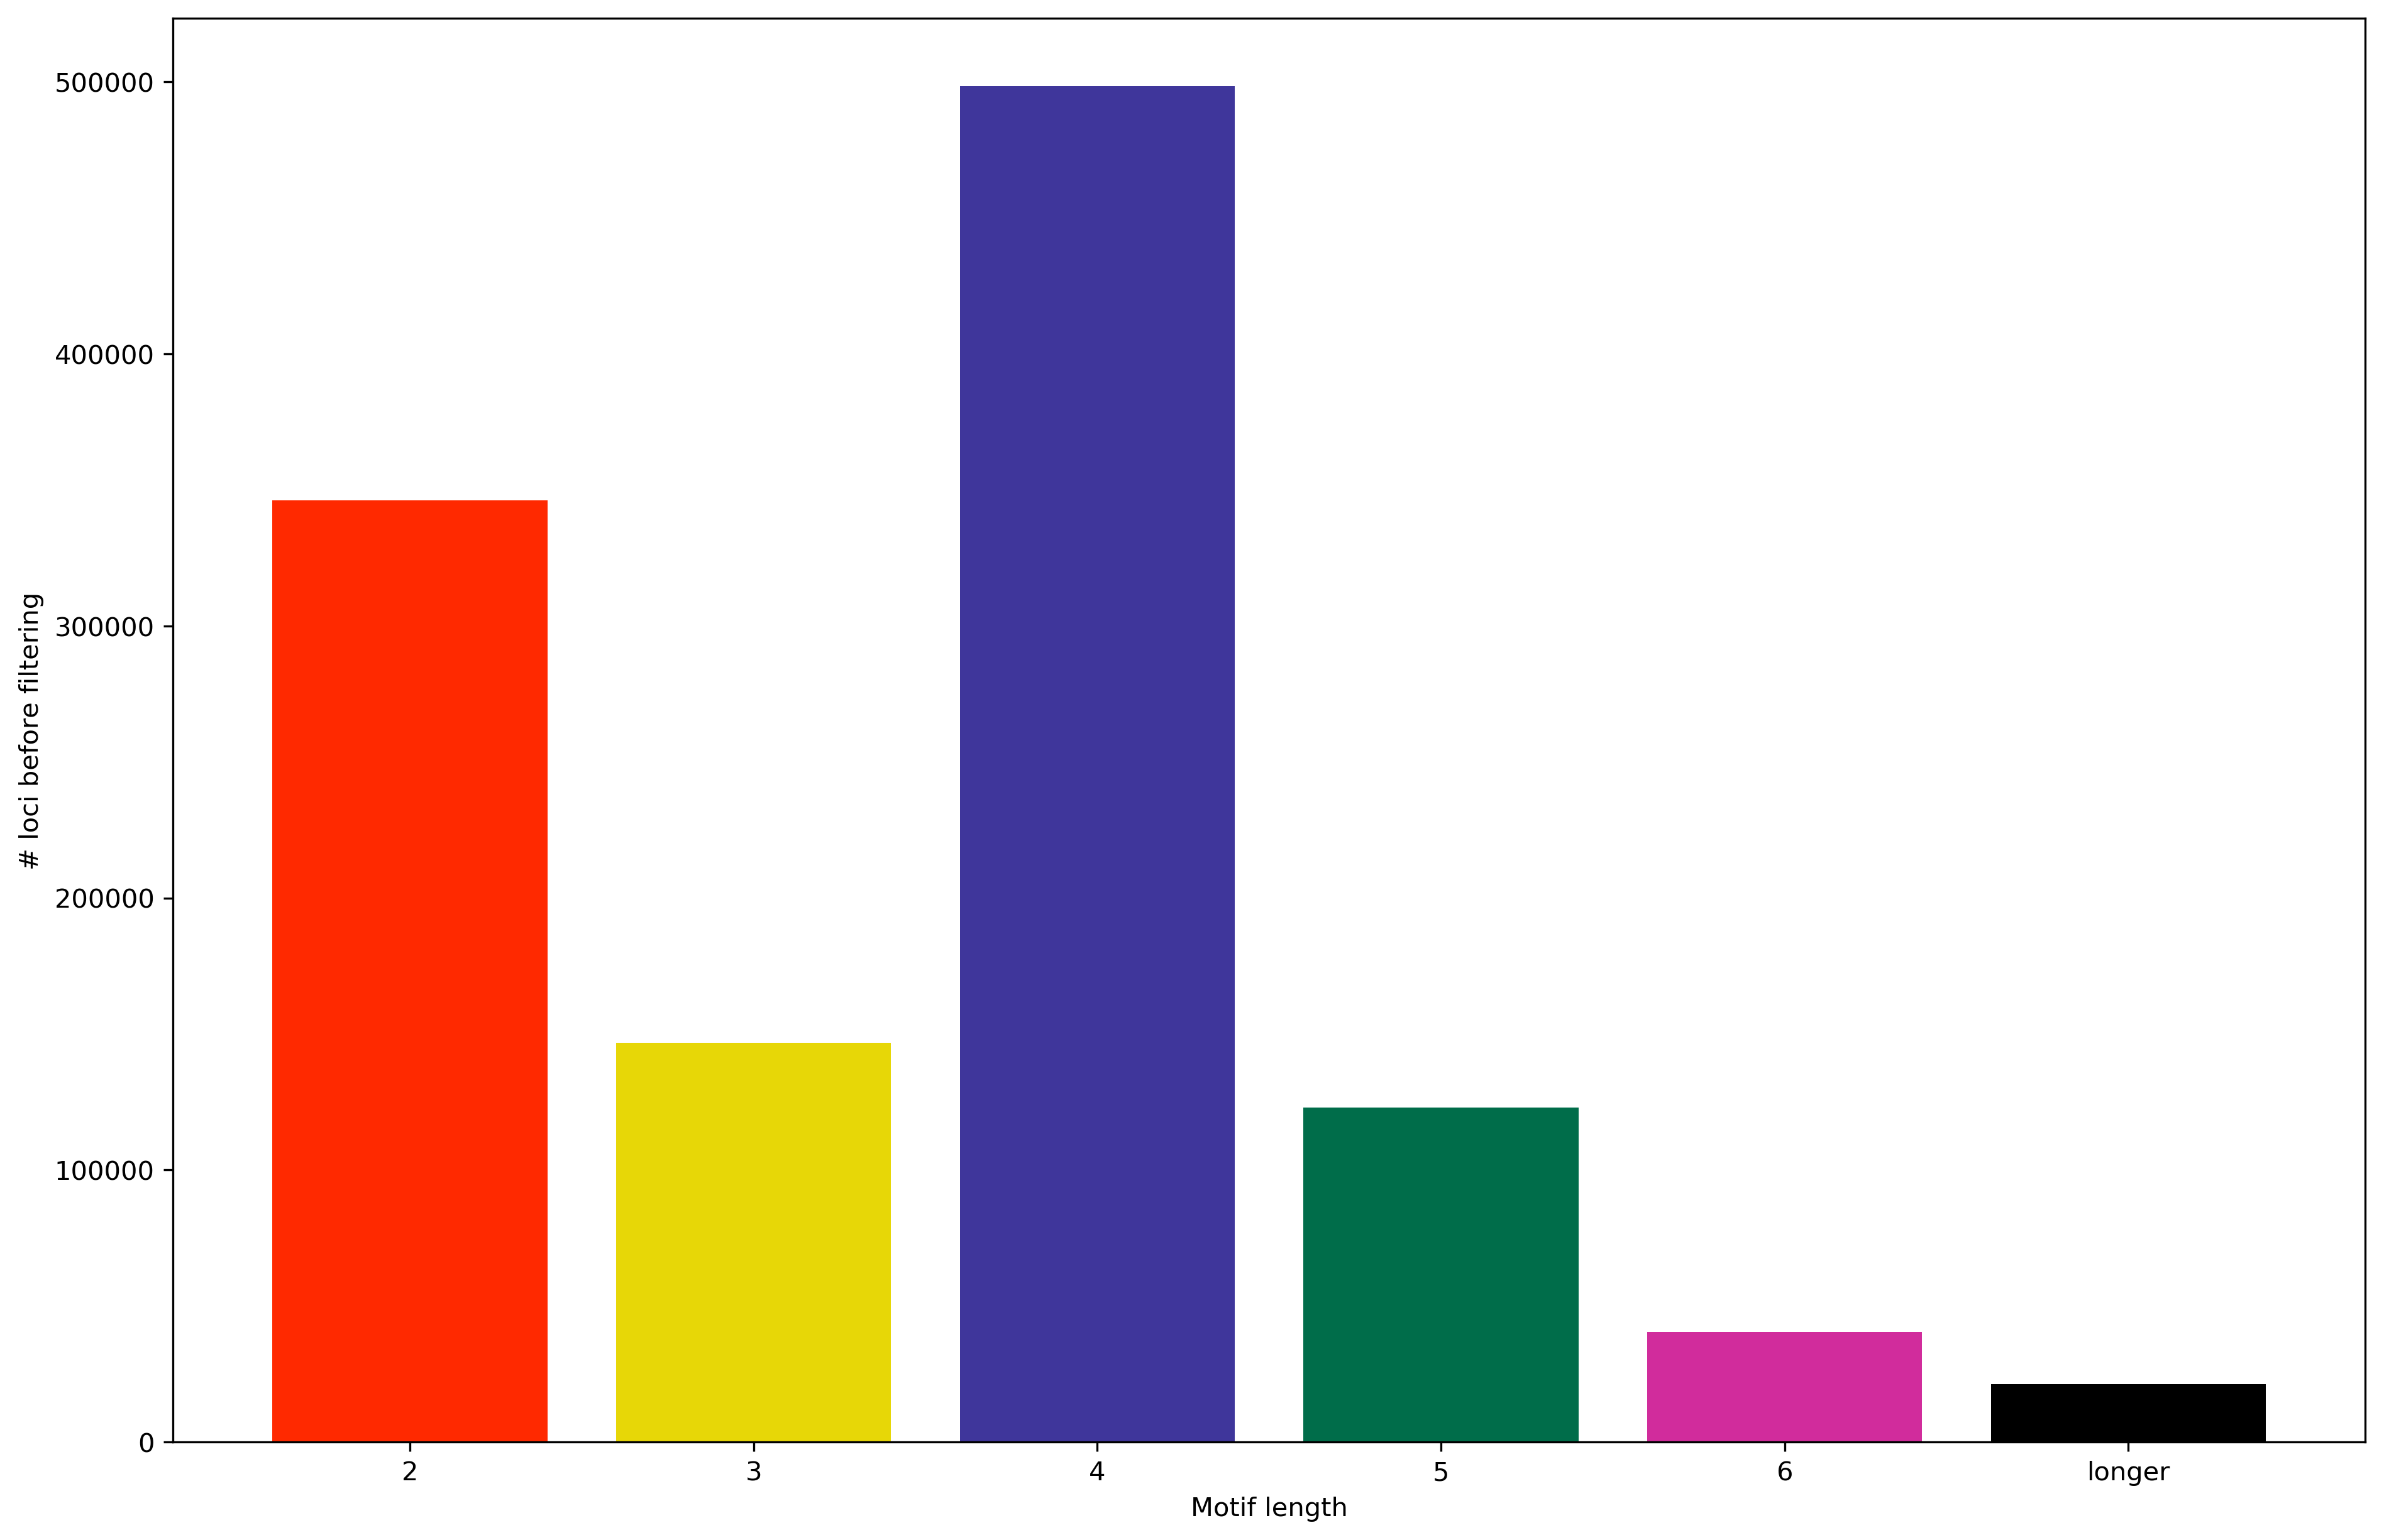

In [86]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=300)
plt.bar(unfiltered_count_len.keys(), unfiltered_count_len.values(), color=motif_colors)
plt.xlabel('Motif length')
plt.ylabel('# loci before filtering')
plt.savefig('SuppFig2a1.pdf')

In [26]:
filtered = pd.read_csv('/Users/cynthiawu/workspace/STR_BXD_032023/BXD-STR-Mutator-Manuscript/outs/all_repcn_proc_nosegdup_nolowcr_segreg.csv')
motif_info = pd.read_csv('/Users/cynthiawu/workspace/STR_BXD_032023/BXD-STR-Mutator-Manuscript/outs/motif_info.csv')


In [25]:
filtered

,chr,pos,end,BXD001,BXD002,BXD005,BXD006,BXD008,BXD009,BXD011,...,BXD219,BXD221,BXD222,BXD223,BXD224,BXD225,BXD226,BXD227,DBA,C57BL
0,chr1,3068357,3068368,"6,6","6,6","5,5","5,5","5,5","6,6","6,6",...,"5,5","5,6","5,5","5,5","6,6","5,5","6,6","5,5","5,5","6,6"
1,chr1,3086953,3086967,NaN,"5,5","6,6",NaN,"6,6","5,5","5,5",...,"6,6","5,6","6,6","6,6","5,5",NaN,"5,5","6,6","6,6","5,5"
2,chr1,3095926,3095945,"4,4","4,4","5,5","5,5","5,5","4,4","4,4",...,"5,5","4,5","5,5","5,5","4,4","5,5","4,4","5,5","5,5","4,4"
3,chr1,3134119,3134160,"14,14","14,14",NaN,"14,14","14,14","14,14","14,14",...,"14,14","14,14","14,14","14,14","14,14","14,14","14,14","14,14","14,14","14,14"
4,chr1,3162873,3162884,NaN,"4,4","6,6","6,6",NaN,"4,4","4,4",...,"6,6","4,6","6,6",NaN,"4,4","6,6","4,4","6,6","6,6","4,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76629,chr19,61221836,61221865,"9,9","6,6","9,9","9,9","9,9","6,6","9,9",...,"9,9","6,9",NaN,"6,9","6,6",NaN,"9,9","6,6","9,9","6,6"
76630,chr19,61222362,61222382,"8,8","7,7","8,8","8,8","8,8","7,7","8,8",...,"8,8","7,8","8,8","7,8","7,7","8,8","8,8","7,7","8,8","7,7"
76631,chr19,61224170,61224185,"9,9","8,8","9,9",NaN,"9,9","8,8","9,9",...,"9,9","8,9",NaN,"8,9","8,8","9,9","9,9",NaN,"9,9","8,8"
76632,chr19,61253164,61253175,"7,7","4,4","7,7","7,7","7,7","4,4","7,7",...,"7,7","4,7","7,7","4,7","4,4","7,7","7,7","4,4","7,7","4,4"


In [27]:
motif_info

,chr,pos,end,motif_len,motif,canon_motif
0,chr1,3000098,3000123,1,T,A
1,chr1,3004986,3004997,4,TCTG,AGAC
2,chr1,3005549,3005568,5,AAAAC,AAAAC
3,chr1,3006760,3006775,1,A,A
4,chr1,3009351,3009402,2,TG,AC
...,...,...,...,...,...,...
1544612,chr11,37611522,37611533,4,AAAT,AAAT
1544613,chr11,37612448,37612461,2,AC,AC
1544614,chr11,37612490,37612549,6,ATACAC,ATACAC
1544615,chr11,37616443,37616462,4,AAAC,AAAC


In [29]:
filtered_motif = filtered.merge(motif_info, left_on=['chr', 'pos', 'end'], right_on=['chr', 'pos', 'end'], how='left')

In [31]:
filtered_motif['motif_len']

0        2
1        3
2        5
3        3
4        3
        ..
76629    5
76630    3
76631    2
76632    3
76633    5
Name: motif_len, Length: 76634, dtype: int64

In [37]:
filtered_count = Counter(filtered_motif['motif_len'])

In [49]:
longer = 0
filtered_count_len = {}
for key in filtered_count.keys():
    if key > 6:
        longer += filtered_count[key]
    else:
        filtered_count_len[str(key)] = filtered_count[key]
filtered_count_len['longer'] = longer

In [50]:
filtered_count_len

{'2': 17497, '3': 9957, '5': 8913, '4': 36111, '6': 2919, 'longer': 1237}

<BarContainer object of 19 artists>

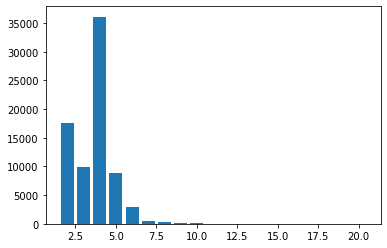

In [36]:
plt.bar(Counter(filtered_motif['motif_len']).keys(), Counter(filtered_motif['motif_len']).values())

In [48]:
filtered_count_len.keys()

dict_keys([2, 3, 5, 4, 6, 'longer'])

In [60]:
filtered_count_len = collections.OrderedDict(sorted(filtered_count_len.items()))


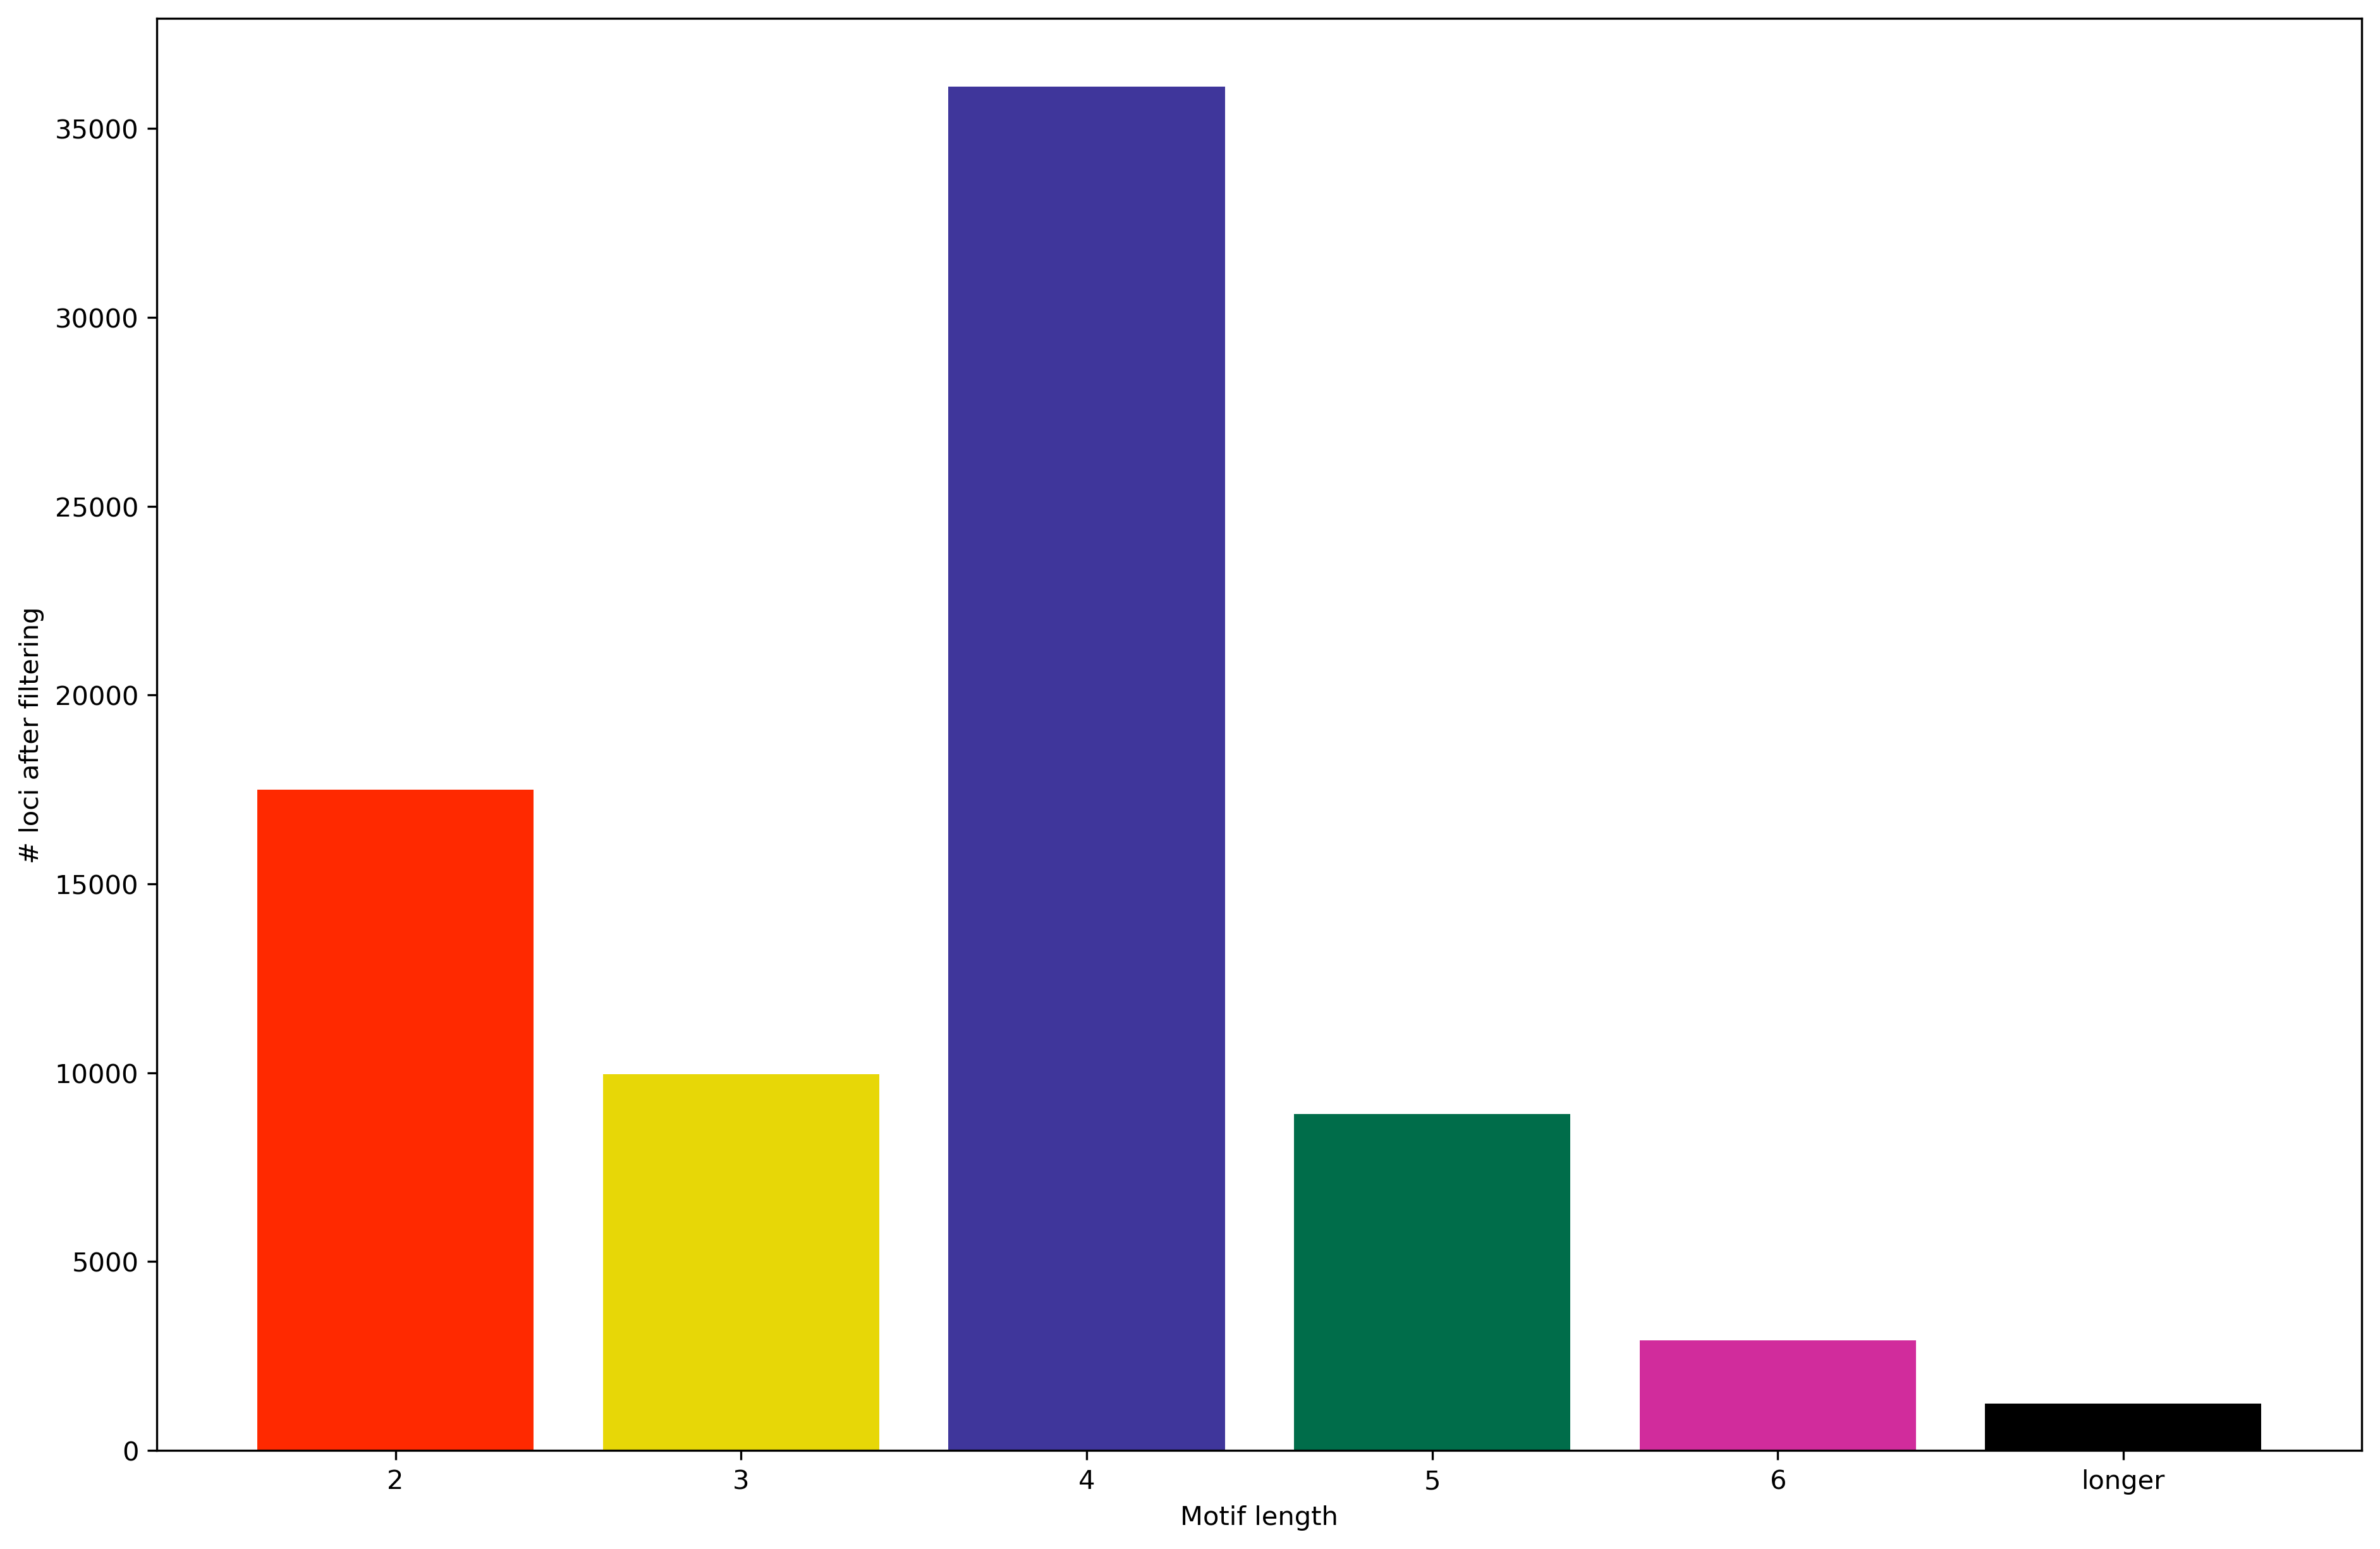

In [85]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=300)

plt.bar(filtered_count_len.keys(), filtered_count_len.values(), color=motif_colors)
plt.xlabel('Motif length')
plt.ylabel('# loci after filtering')
plt.savefig('SuppFig2a2.pdf')

In [87]:
36    +61  + 295  +1394 +20865 +28292 + 1575  + 138 +   52   + 76 

52784

In [88]:
1  +   2   +  1    + 4   +  3    + 4   +  9  +3  +   1 

28

In [95]:
vep = pd.read_csv('/Users/cynthiawu/workspace/STR_BXD_032023/BXD-STR-Mutator-Manuscript/outs/redux_vep_annot.csv', index_col=0)
fou_gt_at_peak = pd.read_csv('/Users/cynthiawu/workspace/STR_BXD_032023/BXD-STR-Mutator-Manuscript/outs/fou_gt_at_peak.csv', index_col=0)
perc_exp_byhap = pd.read_csv('/Users/cynthiawu/workspace/STR_BXD_032023/BXD-STR-Mutator-Manuscript/outs/perc_exp_byhap.csv', index_col=0)


In [96]:
vep

,loc_type,chr,pos,end,Gene,Feature,Feature_type,Consequence,IMPACT,VARIANT_CLASS,SYMBOL,BIOTYPE,sv_type
1,str,chr13,89423869,89423896,NaN,NaN,NaN,intergenic_variant,MODIFIER,indel,NaN,NaN,NaN
2,str,chr13,89427576,89427593,NaN,NaN,NaN,intergenic_variant,MODIFIER,indel,NaN,NaN,NaN
3,str,chr13,89435933,89435948,NaN,NaN,NaN,intergenic_variant,MODIFIER,indel,NaN,NaN,NaN
4,str,chr13,89436358,89436369,NaN,NaN,NaN,intergenic_variant,MODIFIER,indel,NaN,NaN,NaN
5,str,chr13,89438464,89438475,NaN,NaN,NaN,intergenic_variant,MODIFIER,indel,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196160,snp,chr13,93417889,93417889,ENSMUSG00000113514,ENSMUST00000222962,Transcript,downstream_gene_variant,MODIFIER,sequence_alteration,Gm18960,processed_pseudogene,NaN
196161,snp,chr13,93417915,93417915,ENSMUSG00000114019,ENSMUST00000220564,Transcript,downstream_gene_variant,MODIFIER,insertion,Gm47155,TEC,NaN
196162,snp,chr13,93417915,93417915,ENSMUSG00000113514,ENSMUST00000222962,Transcript,downstream_gene_variant,MODIFIER,insertion,Gm18960,processed_pseudogene,NaN
196163,snp,chr13,93418178,93418178,ENSMUSG00000113514,ENSMUST00000222962,Transcript,downstream_gene_variant,MODIFIER,deletion,Gm18960,processed_pseudogene,NaN


In [97]:
fou_gt_at_peak

,strain,marker,fou_gt
1,BXD001,chr13_91206761_91206761,D
2,BXD002,chr13_91206761_91206761,D
3,BXD005,chr13_91206761_91206761,B
4,BXD006,chr13_91206761_91206761,B
5,BXD008,chr13_91206761_91206761,B
...,...,...,...
148,BXD223,chr13_91206761_91206761,B
149,BXD224,chr13_91206761_91206761,B
150,BXD225,chr13_91206761_91206761,D
151,BXD226,chr13_91206761_91206761,B


In [98]:
perc_exp_byhap

,strain,perc_expand,off_epoch,fou_gt,n
1,BXD102,0.800000,epoch_3b,B,240
2,BXD098,0.780392,epoch_3b,B,255
3,BXD081,0.779874,epoch_3b,B,159
4,BXD044,0.774194,epoch_3a,B,217
5,BXD061,0.761905,epoch_3b,B,231
...,...,...,...,...,...
147,BXD201,0.551282,epoch_6,D,78
148,BXD155,0.527473,epoch_4,D,91
149,BXD009,0.518325,epoch_1,D,573
150,BXD015,0.517056,epoch_1,D,557


In [101]:
fou_gt_at_peak[fou_gt_at_peak['strain']=='BXD102']

,strain,marker,fou_gt
81,BXD102,chr13_91206761_91206761,B
